In [28]:
import numpy as np
from glob import glob
import os

In [29]:
FOLDER = "close_model_distances"

In [30]:
files = glob(f"{FOLDER}/*.txt")
print(files)

['close_model_distances/0_1M.txt', 'close_model_distances/0_4M.txt', 'close_model_distances/0_5M.txt', 'close_model_distances/0_35M.txt', 'close_model_distances/0_2M.txt', 'close_model_distances/0_15M.txt', 'close_model_distances/0_45M.txt', 'close_model_distances/0_25M.txt']


In [31]:
record = {}
for dist_file in files:
    with open(dist_file) as f:
        name = os.path.split(dist_file)[1].split('.')[0].replace("M", "").replace("_", ".")
        lines = [int(line) for line in f.readlines()]
        mean = np.mean(lines)
        std = np.std(lines)
        record[name] = {"mean": mean, "std": std}
        print(f"Distance: {name}m Mean: {mean}, STD: {std}")

Distance: 0.1m Mean: 42526.446601941745, STD: 8003.326467064229
Distance: 0.4m Mean: 3092.1739130434785, STD: 136.853561482649
Distance: 0.5m Mean: 1848.5774647887324, STD: 506.1080623342903
Distance: 0.35m Mean: 4507.771739130435, STD: 722.1793873146705
Distance: 0.2m Mean: 11070.20634920635, STD: 755.9467869642627
Distance: 0.15m Mean: 17880.344262295082, STD: 2376.4929173892997
Distance: 0.45m Mean: 2436.458823529412, STD: 151.73402060968604
Distance: 0.25m Mean: 6623.086419753086, STD: 645.3821568141587


In [32]:
from matplotlib import pyplot as plt

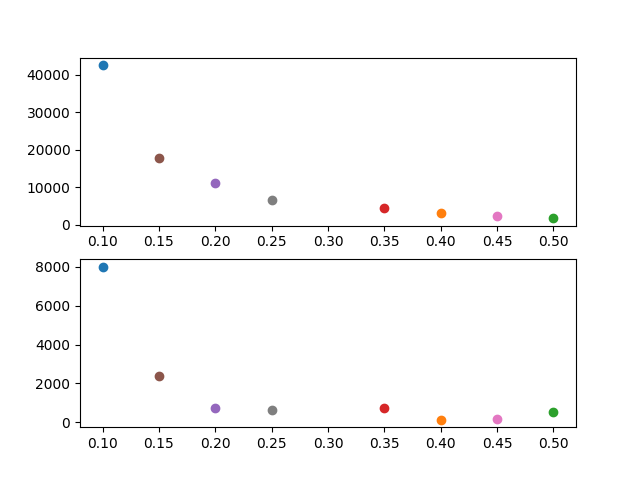

In [33]:
%matplotlib widget
fig_mean = plt.figure(1)
plt.subplot(211)

for name in record:
    entry = record[name]
    mean = entry["mean"]
    plt.scatter(float(name), mean)


plt.subplot(212)
for name in record:
    entry = record[name]
    std = entry["std"]
    plt.scatter(float(name), std)

In [40]:
def load_mean_std(folderName):
    files = glob(f"{folderName}/*.txt")
    record = {}
    for dist_file in files:
        with open(dist_file) as f:
            name = os.path.split(dist_file)[1].split('.')[0].replace("M", "").replace("_", ".")
            lines = [int(line) for line in f.readlines()]
            mean = np.mean(lines)
            std = np.std(lines)
            record[name] = {"mean": mean, "std": std}
    return record

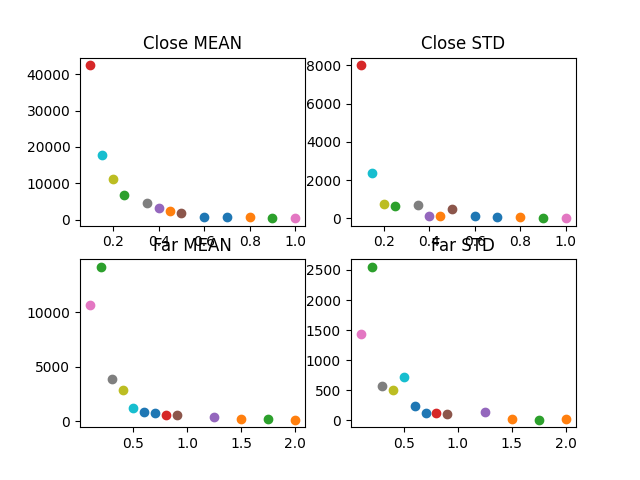

In [45]:
%matplotlib widget
record = load_mean_std("close_model_distances")
fig_mean = plt.figure(1)

plot_1 = fig_mean.add_subplot(221)
plot_1.set_title("Close MEAN")
for name in record:
    entry = record[name]
    mean = entry["mean"]
    plot_1.scatter(float(name), mean)


plot_2 = fig_mean.add_subplot(222)
plot_2.set_title("Close STD")
for name in record:
    entry = record[name]
    std = entry["std"]
    plot_2.scatter(float(name), std)

record = load_mean_std("far_model_distances")

plot_3 = fig_mean.add_subplot(223)
plot_3.set_title("Far MEAN")
for name in record:
    entry = record[name]
    mean = entry["mean"]
    plot_3.scatter(float(name), mean)


plot_4 = fig_mean.add_subplot(224)
plot_4.set_title("Far STD")
for name in record:
    entry = record[name]
    std = entry["std"]
    plot_4.scatter(float(name), std)